In [3]:
import deepxde as dde
import numpy as np
from deepxde.backend import tf
import matplotlib.pyplot as plt

아래의 함수를 근사화 해보자
# 문제정의
$$f(x,y) = \sin(x) * \sin(y)$$

# 구현

In [13]:
x=np.linspace(-np.pi, np.pi, 50)
y=np.linspace(-np.pi, np.pi, 50)
xx, yy = np.meshgrid(x, y)
X = np.vstack((np.ravel(xx), np.ravel(yy))).T
 
f_exact=func(xx,yy)
f=f_exact.flatten()[:, None]

def pde(x, f):
    df_xx = dde.grad.hessian(f, x, i=0, j=0)
    df_yy = dde.grad.hessian(f, x, i=1, j=1)
    return df_xx+df_yy + 2*f

In [15]:
geom = dde.geometry.Interval(-np.pi, np.pi)
timedomain = dde.geometry.TimeDomain(-np.pi, np.pi)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

bc = dde.icbc.DirichletBC(geomtime, lambda x: 0, lambda _, on_boundary: on_boundary)
ic = dde.icbc.IC(
    geomtime, lambda x: -np.sin(np.pi * x[:, 0:1]), lambda _, on_initial: on_initial
)

Compiling model...
Building feed-forward neural network...
'build' took 0.122925 s



/usr/local/lib/python3.8/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:114: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
2023-11-10 06:40:08.885386: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-10 06:40:08.889701: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-10 06:40:08.890541: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have be

'compile' took 2.961167 s

Initializing variables...
Training model...



2023-11-10 06:40:11.749167: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2023-11-10 06:40:11.938792: I tensorflow/compiler/xla/service/service.cc:170] XLA service 0x7efca0009420 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-10 06:40:11.938903: I tensorflow/compiler/xla/service/service.cc:178]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-11-10 06:40:11.958600: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:263] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-10 06:40:15.523734: I tensorflow/compiler/jit/xla_compilation_cache.cc:478] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Step      Train loss                        Test loss                         Test metric
0         [1.62e+00, 6.77e-01, 1.15e+00]    [1.62e+00, 6.77e-01, 1.15e+00]    []  
1000      [3.45e-03, 4.84e-03, 4.44e-01]    [3.45e-03, 4.84e-03, 4.44e-01]    []  
2000      [3.57e-02, 7.62e-03, 3.30e-01]    [3.57e-02, 7.62e-03, 3.30e-01]    []  
3000      [4.12e-02, 3.63e-03, 1.30e-01]    [4.12e-02, 3.63e-03, 1.30e-01]    []  
4000      [1.78e-02, 8.79e-04, 3.16e-02]    [1.78e-02, 8.79e-04, 3.16e-02]    []  
5000      [7.95e-03, 9.91e-04, 1.66e-02]    [7.95e-03, 9.91e-04, 1.66e-02]    []  
6000      [5.17e-03, 1.00e-03, 1.15e-02]    [5.17e-03, 1.00e-03, 1.15e-02]    []  
7000      [4.56e-03, 1.01e-03, 8.53e-03]    [4.56e-03, 1.01e-03, 8.53e-03]    []  
8000      [3.95e-03, 9.29e-04, 7.15e-03]    [3.95e-03, 9.29e-04, 7.15e-03]    []  
9000      [2.97e-03, 1.23e-03, 5.09e-03]    [2.97e-03, 1.23e-03, 5.09e-03]    []  
10000     [1.93e-03, 1.13e-03, 4.36e-03]    [1.93e-03, 1.13e-03, 4.36e-03]    []

2023-11-10 06:41:49.989298: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1750] (One-time warning): Not using XLA:CPU for cluster.

If you want XLA:CPU, do one of the following:

 - set the TF_XLA_FLAGS to include "--tf_xla_cpu_global_jit", or
 - set cpu_global_jit to true on this session's OptimizerOptions, or
 - use experimental_jit_scope, or
 - use tf.function(jit_compile=True).

To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a
proper command-line flag, not via TF_XLA_FLAGS).


Step      Train loss                        Test loss                         Test metric
15000     [2.52e-03, 1.16e-03, 2.97e-03]    [2.52e-03, 1.16e-03, 2.97e-03]    []  
16000     [4.80e-04, 8.88e-04, 8.92e-04]    [4.80e-04, 8.88e-04, 8.92e-04]        
17000     [2.83e-04, 7.70e-04, 5.42e-04]    [2.83e-04, 7.70e-04, 5.42e-04]        
18000     [1.96e-04, 6.20e-04, 4.22e-04]    [1.96e-04, 6.20e-04, 4.22e-04]        
19000     [1.39e-04, 4.65e-04, 4.01e-04]    [1.39e-04, 4.65e-04, 4.01e-04]        
20000     [1.30e-04, 4.06e-04, 3.17e-04]    [1.30e-04, 4.06e-04, 3.17e-04]        
21000     [1.09e-04, 3.11e-04, 2.94e-04]    [1.09e-04, 3.11e-04, 2.94e-04]        
INFO:tensorflow:Optimization terminated with:
  Message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  Objective function value: 0.000636
  Number of iterations: 6462
  Number of functions evaluations: 6814
21814     [9.48e-05, 2.75e-04, 2.66e-04]    [9.48e-05, 2.75e-04, 2.66e-04]    []  

Best model at step 21814:
  train 

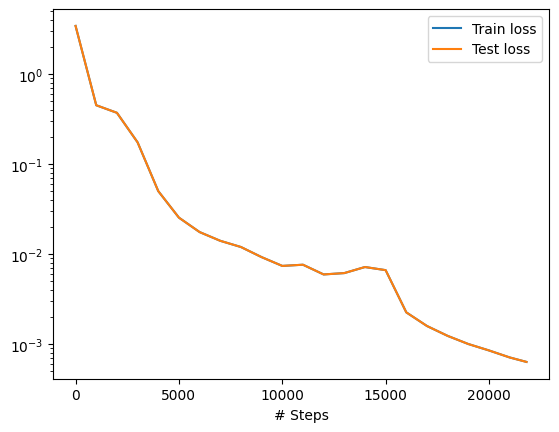

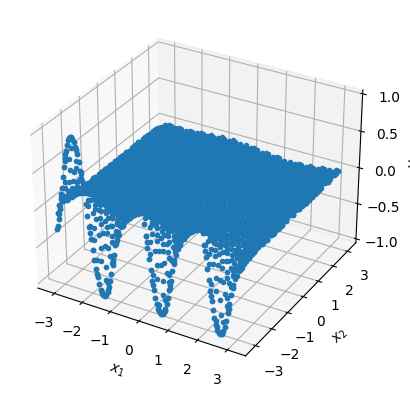

NameError: name 'gen_testdata' is not defined

In [16]:
data = dde.data.TimePDE(
    geomtime, pde, [bc, ic], num_domain=2540, num_boundary=80, num_initial=160
)
net = dde.nn.FNN([2] + [20] * 3 + [1], "tanh", "Glorot normal")
model = dde.Model(data, net)

model.compile("adam", lr=1e-3)
model.train(iterations=15000)
model.compile("L-BFGS")
losshistory, train_state = model.train()
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

X, y_true = gen_testdata()
y_pred = model.predict(X)
f = model.predict(X, operator=pde)
print("Mean residual:", np.mean(np.absolute(f)))
print("L2 relative error:", dde.metrics.l2_relative_error(y_true, y_pred))
np.savetxt("test.dat", np.hstack((X, y_true, y_pred)))